# Infinite-armed bandit problems

## Import libraries and modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import time
from math import ceil, sqrt, log, floor, log2

In [2]:
from arm.Bernoulli import Bernoulli
from arm.Gaussian import Gaussian

from algorithm.Greedy import SubSampledGreedy
from algorithm.MeDZO import MeDZO_IAB, empMeDZO_IAB
from algorithm.TwoTarget import TwoTarget
from algorithm.UCBF import UCBF

from environment.MAB import MAB
from environment.BayesMAB import EvaluationBayesMAB

## Experimental setup

In [3]:
np.random.seed(1234)

nb_rep = 10
scenario = 1
horizon = 10000
K = horizon
tsav = []

if scenario == 0:
    # Bernoulli bandit problems with U([0, 1]) prior on mean rewards
    alpha = 1
    beta = 1
    beta_greedy = 1
    envs = []
    for _ in range(nb_rep):
        means = np.random.beta(1, 1, K)
        envs += [MAB([Bernoulli(p) for p in means])]
elif scenario == 1:
    # Bernoulli bandit problems with Beta(1, 2) prior on mean rewards
    alpha = 2
    beta = 1
    beta_greedy = 2
    envs = []
    for _ in range(nb_rep):
        means = np.random.beta(1, 2, K)
        envs += [MAB([Bernoulli(p) for p in means])]

## Compare various algorithms

In [4]:
algorithms = [UCBF(horizon, beta=1),
              SubSampledGreedy(K, ceil((2/3)**((2+beta_greedy)/(4+beta_greedy))
                                       *(8)**(2/(4+beta_greedy))
                                       *(4+beta_greedy)**(-2/(4+beta_greedy))
                                       *horizon**((2+beta_greedy)/(4+beta_greedy))
                                       *log(horizon)**(2/(4+beta_greedy)))), 
              TwoTarget(horizon, 3, alpha=alpha, beta=beta)]
              #MeDZO_IAB(horizon, sqrt(horizon), c=1),
              #empMeDZO_IAB(horizon, sqrt(horizon), c=1)]

Start evaluation of UCBF
0
1
2
3
4
5
6
7
8
9
Regret of UCBF : 4383.882483291336 +- 304.1501282383499 

Start evaluation of SubSampledGreedy
0
1
2
3
4
5
6
7
8
9
Regret of SubSampledGreedy : 1101.5455052279704 +- 200.51459484024713 

Start evaluation of TwoTarget
0
1
2
3
4
5
6
7
8
9
Regret of TwoTarget : 3973.134114569737 +- 1084.4305956907895 



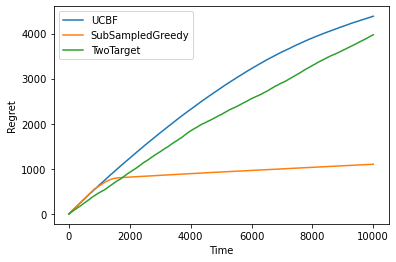

In [5]:
plt.figure()

for algo in algorithms:
    print('Start evaluation of', algo.__class__.__name__)
    ev = EvaluationBayesMAB(envs, algo, horizon, tsav)
    mean_regret = ev.mean_regret()
    std_regret = ev.std_regret()
    print('Regret of', algo.__class__.__name__, ':', mean_regret[-1], '+-', std_regret[-1], '\n')
    
    
    plt.plot(ev.tsav, mean_regret)
    #plt.fill_between(ev.tsav, mean_regret-std_regret, mean_regret+std_regret, alpha=.2)
    plt.xlabel('Time')
    plt.ylabel('Regret')

plt.legend([algo.__class__.__name__ for algo in algorithms], loc=0)
plt.show()